Train classical convolutional NN on MNIST data set.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 
import numpy as np
import pickle

In [ ]:
test_img_data_col = pickle.load(open('test_img_data_col.pickle', 'rb'))
N = len(test_img_data_col)
print(N)

X = test_img_data_col[0].shape[0]
Y = test_img_data_col[0].shape[1]

print(X)
print(Y)

x_test_data_col = np.empty((N, X, Y))
y_test_data_col = np.arange(N)
print(x_test_data_col.shape)
print(y_test_data_col.shape)

10
28
28
(10, 28, 28)
(10,)


In [ ]:
from tensorflow.keras.datasets import mnist
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

print(x_test0.shape)
print(y_test0.shape)

(10000, 28, 28)
(10000,)


Keep only 0, 1, 2

In [ ]:
def filter_012(x, y):
    keep = (y == 0) | (y == 1) | (y == 2)
    x, y = x[keep], y[keep]
    #y = y == 3
    return x, y

x_train, y_train = filter_012(x_train0, y_train0)
x_test, y_test = filter_012(x_test0, y_test0)

print("Number of filtered training examples:", len(x_train))
print("Number of filtered test examples:", len(x_test))

Number of filtered training examples: 18623
Number of filtered test examples: 3147


0


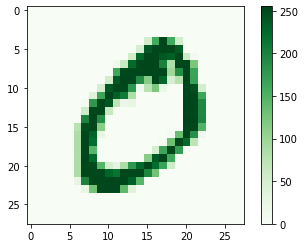

In [ ]:
print(y_train[0])

plt.imshow(x_train[0, :, :], cmap='Greens')
plt.colorbar()

Convert train and test images from gray to rgb; and the upscale the images to 32x32 in order to further feed it to the CNN network.

In [ ]:
shape_xtr = x_train.shape
x_train = np.reshape(x_train, (-1, shape_xtr[1], shape_xtr[2], 1))
print(x_train.shape)

shape_xt = x_test.shape
x_test = np.reshape(x_test, (-1, shape_xt[1], shape_xt[2], 1))
print(x_test.shape)

y_train = tf.keras.utils.to_categorical(y_train)
print(y_train.shape)
y_test = tf.keras.utils.to_categorical(y_test)
print(y_test.shape)

(18623, 28, 28, 1)
(3147, 28, 28, 1)
(18623, 3)
(3147, 3)


Create classical CNN model

In [ ]:
def create_cnn():
  model = tf.keras.Sequential()

  model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
  model.add(tf.keras.layers.AveragePooling2D())

  model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
  model.add(tf.keras.layers.AveragePooling2D())

  model.add(tf.keras.layers.Flatten())

  model.add(tf.keras.layers.Dense(units=120, activation='relu'))

  model.add(tf.keras.layers.Dense(units=84, activation='relu'))

  model.add(tf.keras.layers.Dense(units=3, activation = 'softmax'))

  return model


model = create_cnn()

model.summary()

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_12 (Averag (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_13 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_43 (Dense)             (None, 84)              

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f3d3d606d40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


Fit the model

In [ ]:
tf.config.run_functions_eagerly(True)
print(x_train.shape)
print(x_test.shape)
model.fit(x_train, y_train, 
          batch_size=128,
          epochs=1, verbose=1, validation_data=(x_test, y_test))

(18623, 28, 28, 1)
(3147, 28, 28, 1)
  3/146 [..............................] - ETA: 6s - loss: 0.9849 - accuracy: 0.7240

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


146/146 [==============================] - 7s 50ms/step - loss: 0.0658 - accuracy: 0.9801 - val_loss: 0.0223 - val_accuracy: 0.9911


Evaluate the model

In [ ]:
cnn_results = model.evaluate(x_test, y_test)

11/99 [==>...........................] - ETA: 1s - loss: 0.0367 - accuracy: 0.9886

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


99/99 [==============================] - 1s 12ms/step - loss: 0.0223 - accuracy: 0.9911
